In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [33]:
np.random.seed(15)
data =  np.array([0,1,0,1,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,1,0]).reshape(5,5)
xs = np.c_[np.ones([data.shape[0]]), data] 
xs

array([[1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [1., 1., 1., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0.]])

In [34]:
ys = np.array([0, 0, 0, 3, 3])
ys.resize(5,1)
ys

array([[0],
       [0],
       [0],
       [3],
       [3]])

In [35]:
weights = lambda ins, outs: np.random.randn(ins, outs)

In [36]:
ins = 5
outs = 1
nodes = 15

wi = weights(ins+1, nodes)
ws = weights(nodes, outs) 
err = []

In [37]:
for i in range(5000):
    x = xs @ wi
    x = np.sin(x)
    yh = x @ ws
    e = yh - ys           
    e = np.sum(np.abs(e)) 
    if e < 0.05:
        print('we have converged after {} iterations'.format(i))
        print(ws)
        break
    else: 
        mutation = weights(nodes, outs)*.03
        cw = ws + mutation
        
        x = xs @ wi
        x = np.sin(x)
        yh = x @ cw
        ce = yh - ys
        ce = np.sum(np.abs(ce))
        if ce < e:
            ws = cw
            err.append(e)

we have converged after 1077 iterations
[[-0.5609078038767273 ]
 [-1.1099242514466754 ]
 [ 1.8812430910197684 ]
 [-1.4373416928433977 ]
 [-0.6299355267720862 ]
 [-0.3172980820851355 ]
 [-0.8275668382984849 ]
 [-0.3756979783039195 ]
 [ 0.8663578953488715 ]
 [-0.31826960750728706]
 [-0.652321982109338  ]
 [-1.0213550293542641 ]
 [-0.15651239609979267]
 [ 0.04947396649833917]
 [-1.1310544120199852 ]]


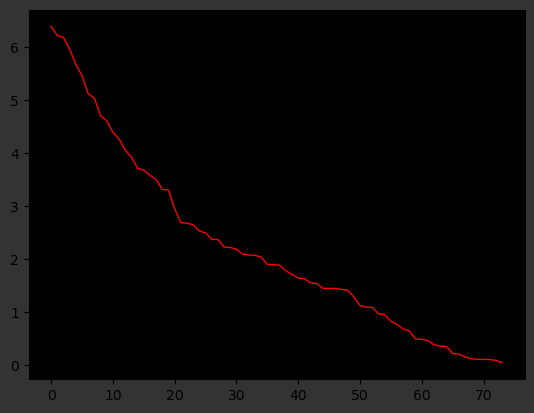

In [38]:
plt.axes().set_facecolor('black')
plt.plot(err,color='red', linewidth=1)
plt.show()

In [39]:
len(err), min(err)

(74, 0.05491996780834696)

In [40]:
np.set_printoptions(suppress=False, floatmode='unique')
#np.set_printoptions(suppress=True, floatmode='unique')

In [41]:
print(ys)
print(yh)

[[0]
 [0]
 [0]
 [3]
 [3]]
[[ 9.9884641750251912e-03]
 [ 6.6401214258249297e-04]
 [-3.4662347372549362e-03]
 [ 2.9854330835821732e+00]
 [ 2.9941144718983113e+00]]


In [42]:
x = xs[3] @ wi
x = np.sin(x)
solution_ = x @ ws
solution_, ys[3] #see what happend?

(array([2.985433083582173]), array([3]))